In [1]:
%matplotlib inline
import numpy as np
from lightgbm import LGBMRegressor
import matplotlib.pyplot as plt

# Pinball Loss
---
The major difference of quantile regression lies in the loss function, where $y$ is the real value, $z$ the quantile forcast, and $\tau$ the target quantile
<img src="pinball_loss.png">

In [2]:
def quantile_loss(y_true, y_pred, q):
    return np.max([q*(y_true - y_pred), (1-q)*(y_pred-y_true)], axis=0)

## Visualize the Loss Function

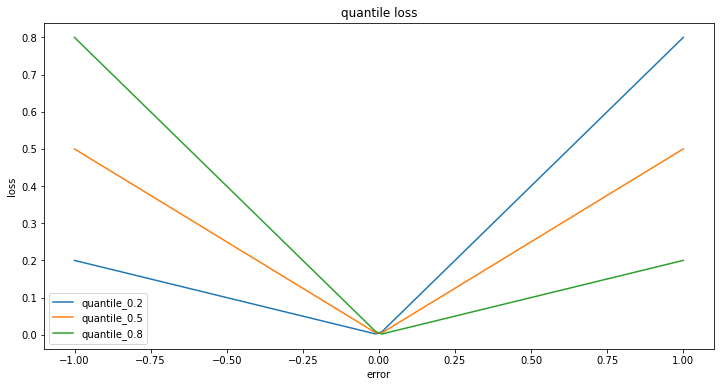

In [3]:
sample_size = 100
y_true = np.zeros(sample_size)
y_pred = np.linspace(-1, 1, 100)
quantiles = [0.2, 0.5, 0.8]


plt.figure(figsize=[12, 6])
for q in quantiles:
    losses = quantile_loss(y_true, y_pred, q)
    plt.plot(y_pred, losses, label='quantile_{}'.format(q))

plt.title('quantile loss')
plt.xlabel('error')
plt.ylabel('loss')
plt.legend()

For high quantiles, when the prediction is larger than true value the loss is smaller compared to that of small quantiles.

# Generate Sample Dataset

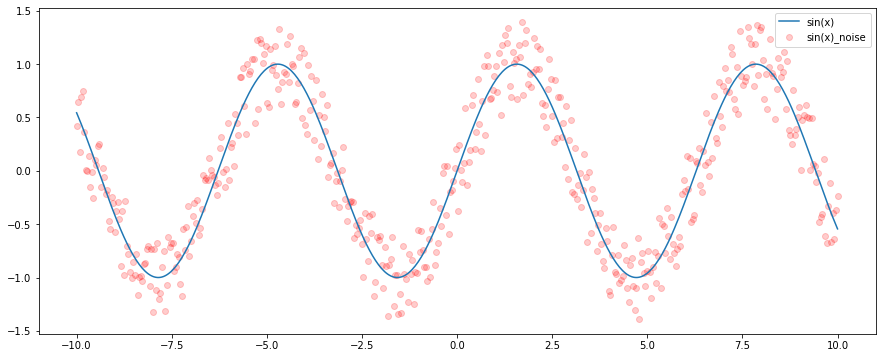

In [4]:
sample_size = 500
x = np.linspace(-10, 10, sample_size)
y = np.sin(x)
y_noise = y + np.random.uniform(-0.4, 0.4, sample_size)

plt.figure(figsize=[15, 6])
plt.plot(x, y, label='sin(x)')
plt.scatter(x, y_noise, label='sin(x)_noise', color='red', alpha=0.2)
plt.legend()

# LightGBM Prediction

In [5]:
params = {
    'objective': 'quantile',
    'metric': 'quantile',
    'max_depth': 4,
    'num_leaves': 15,
    'learning_rate': 0.1,
    'n_estimators': 100,
    'boosting_type': 'gbdt'
}

In [6]:
y_preds = np.zeros((500, 3))
quantiles = [.1, .5, .9]
x_train, y = x.reshape(-1, 1), y_noise

for i in range(len(quantiles)):
    print('prediction of quantile', quantiles[i])
    lgb = LGBMRegressor(alpha=quantiles[i], **params)
    model = lgb.fit(x_train, y)
    y_preds[:, i] = model.predict(x_train)

prediction of quantile 0.1
prediction of quantile 0.5
prediction of quantile 0.9


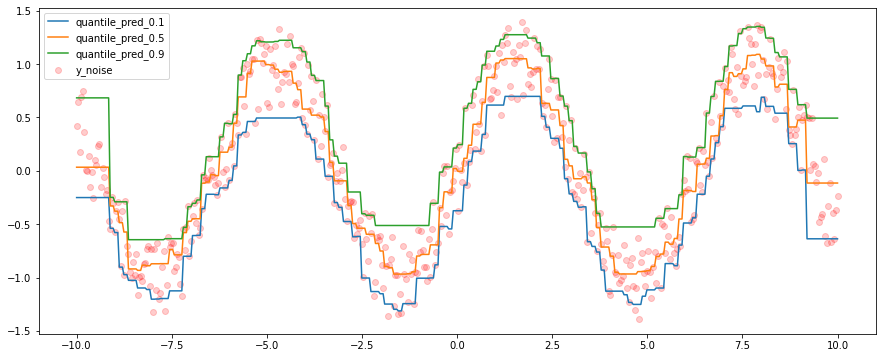

In [7]:
plt.figure(figsize=[15, 6])

plt.scatter(x, y_noise, label='y_noise', alpha=.2, color='red')
for i in range(len(quantiles)):
    plt.plot(x, y_preds[:, i], label='quantile_pred_{}'.format(quantiles[i]))
plt.legend()